## Inicialización

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import sympy as sp
np.seterr(all='ignore')
import skdsp.signal.discrete as ds
plt.rcParams['text.usetex'] = True

In [27]:
npts = 32
sgs = [ds.Delta(), ds.Step(), ds.Ramp(), None, None]
sgKeys = ['delta', 'escalón', 'rampa', 'pulso rectangular', 'pulso triangular']
sgButtons = widgets.ToggleButtons(
    options=list(zip(sgKeys, range(0, len(sgKeys)))),
    description='señal:',
    disabled=False,
    button_style='info'
)
opKeys = ['retardo', 'reflexión y retardo', 'retardo y reflexión']
opButtons = widgets.ToggleButtons(
    options=list(zip(opKeys, range(0, len(opKeys)))),
    description='operación:',
    disabled=False,
    button_style='success'
)
opHbox = widgets.HBox([opButtons])
delSlider = widgets.IntSlider(min=-(npts-1), max=(npts-1), description='retardo:')
widthSlider = widgets.IntSlider(min=0, max=(npts-1), description='anchura:')

## Señales Básicas

<IPython.core.display.Javascript object>


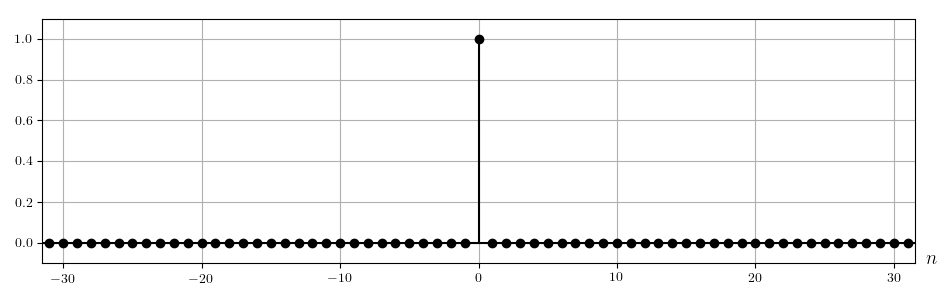

In [33]:
# señales básicas 1
ns = np.arange(-npts, npts+1)
plt.figure(figsize=(9.5, 3), tight_layout=True)
pl = plt.stem(ns, sgs[0][ns], linefmt='k-', basefmt='k-', markerfmt='ok')
plt.axis([-npts+0.5, npts-0.5, -0.1, 1.1])
plt.grid(True)
plt.xlabel(r'$n$', size=14, position=(1.02, 0), labelpad=-25)
def s1(sg=0, fd=0, delay=0, width=16):
    widthSlider.disabled = (sg < 3)
    s = sgs[sg]
    if s is None:
        if sg == 3:
            s = ds.RectPulse(width)
            widthSlider.min = 0
        elif sg == 4:
            if width == 0:
                width = 1
            s = ds.TriangPulse(width)
            widthSlider.min = 1
    if fd == 0:
        s = s.delay(delay)
    elif fd == 1:
        s = s.flip().delay(delay)
    elif fd == 2:
        s = s.delay(delay).flip()
    ys = s[ns]
    pl[0].set_ydata(ys)
    for k in range(len(ns)):
        pl[1][k].set_ydata([0, ys[k]])
    min_ = min(0, np.min(ys))
    max_ = max(np.max(ys), 1)
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.title(s.latex_yexpr(mode='inline'), loc='left', size=14)
widgets.interact(s1, sg=sgButtons, fd=opButtons, delay=delSlider, width=widthSlider);